# Compare Python and C++ 

### code from previous notebooks

In [13]:
from PIL import Image
import ctypes
from ctypes import *
import numpy as np
import time

# http://localhost:8888/notebooks/1_Image_Metadata.ipynb
from AI_Decomposed import image_meta 
from AI_Decomposed import display_channel

# http://localhost:8888/notebooks/2_Py_Convolution.ipynb
from AI_Decomposed import PY_recurse_pooling

# http://localhost:8888/notebooks/3_CPP_Convolution.ipynb
from AI_Decomposed import native_recurse_pooling
CPP_recurse_convolution = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution

## Let's compare the performance between C++ and Python

In [14]:
image_file = './imgs/green_911_turbo_86.jpeg'
[height, width, red,green,blue] = image_meta(image_file)
channel_size = height * width

print('image height  : ', height)
print('image width   : ', width)
print('chanel size   : ', channel_size)
print('total pixels  : ', channel_size * 3) # 3 channels

image height  :  600
image width   :  800
chanel size   :  480000
total pixels  :  1440000


### First C++

In [17]:
import time

recurse_cnt = 1

start = time.time()
# create reference to C++ fucntion
cpp_function_ptr = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution
CPP_convolution = native_recurse_pooling(green, width, recurse_cnt, False, cpp_function_ptr)
print (time.time() - start)

0.2341005802154541


### Second Python

In [10]:
start = time.time()
PY_convolution = PY_recurse_pooling(green, width, np.mean, recurse_cnt)
print (time.time() - start)

8.785209894180298


### verify results

In [11]:
recurse_cnt = 1
display(len(CPP_convolution))
display(len(PY_convolution))

478601

478601

### verify results visually

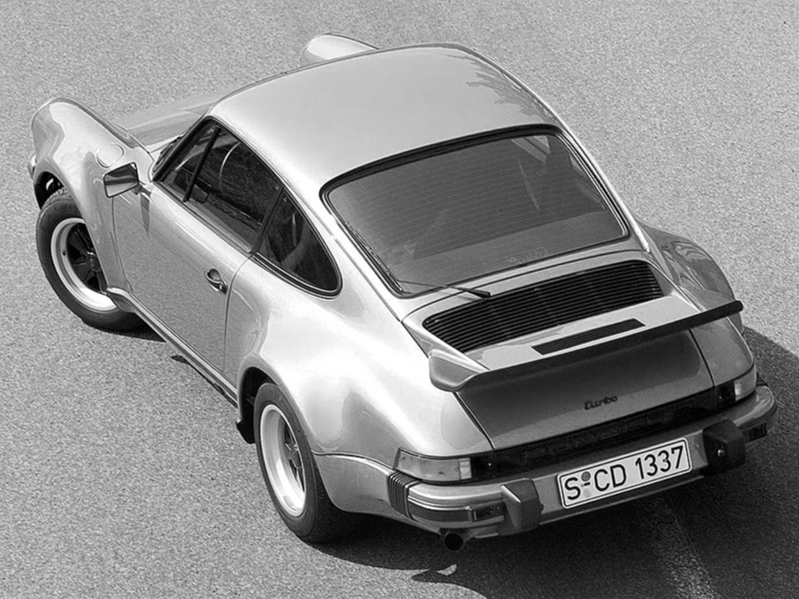

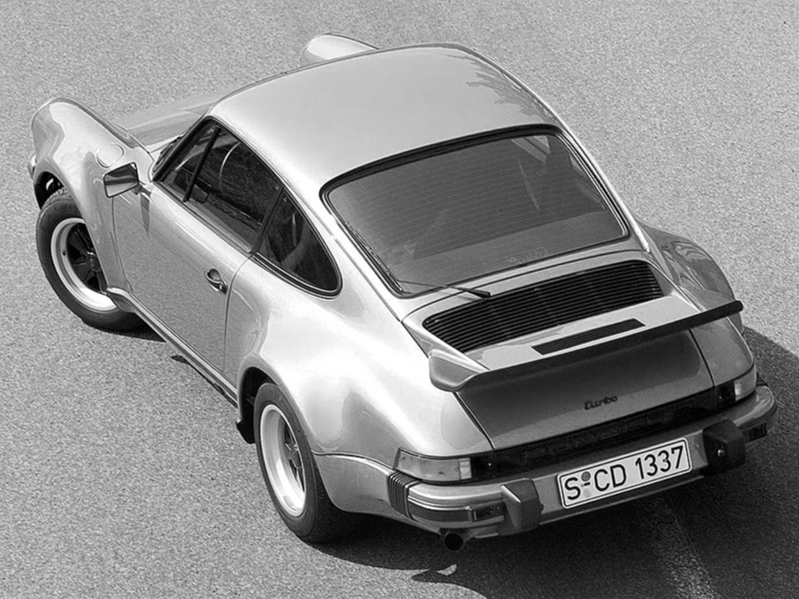

In [12]:
recurse_cnt = 1
display_channel(CPP_convolution, width - (recurse_cnt))
display_channel(PY_convolution, width - (recurse_cnt))

### let's test performance at different scales

mat_size	,	recurse_cnt,	cpp_time,	py_time
480000		,	1,		0.24,		7.61
480000		,	5,		0.73,		40.87
480000		,	10,		1.53,		77.38
480000		,	15,		1.95,		111.25
480000		,	20,		2.76,		155.63
480000		,	25,		3.43,		201.86


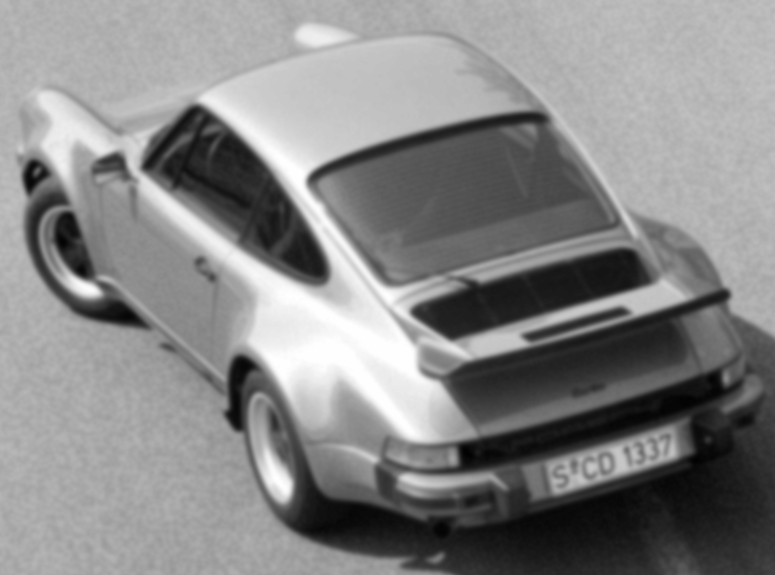

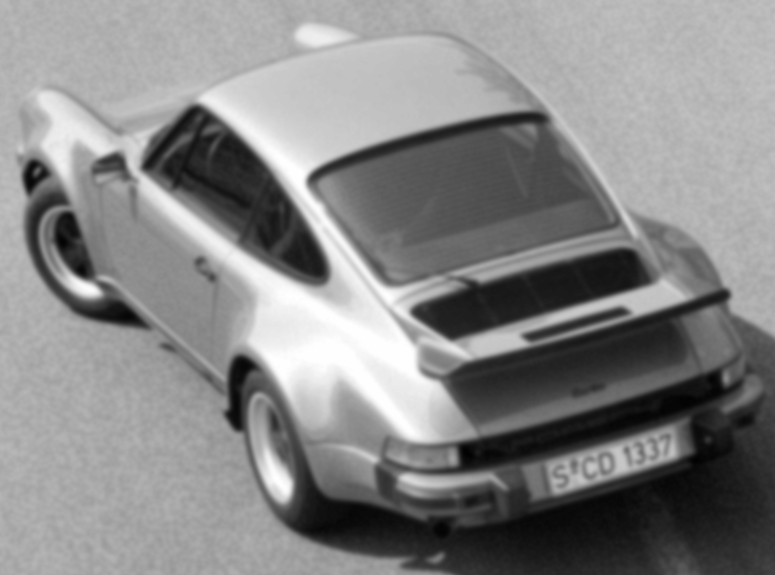

In [18]:
print('mat_size\t,\trecurse_cnt,\tcpp_time,\tpy_time')

cpp_function_ptr = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution

for recurse_cnt in [1,5,10,15,20,25]:
    
    print(len(green),  end='', flush=True)
    print('\t\t,\t',   end='', flush=True)
    
    print(recurse_cnt, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    cpp_conv = native_recurse_pooling(green, width, recurse_cnt, False, cpp_function_ptr)    
    secs = round(time.time() - start,2)
    print(secs, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    py_conv = PY_recurse_pooling(green, width, np.mean, recurse_cnt)    
    secs = round(time.time() - start,2)
    print(secs, end='', flush=True)
        
    print()
    
    if recurse_cnt == 25:
        display_channel(cpp_conv, width - (recurse_cnt))
        display_channel(py_conv, width - (recurse_cnt))
    